# Concordance des assignations taxonomiques entre les bases de références

Ce script vise a comparer la similarité des assignations faites par 3 bases de référence taxonomique. Le nombre d'attribution identique pour un meme rang taxonomique sera dénombré, les similitudes (chevauchement) et désaccord entre les bases de données seront ainsi quantifié et représenté graphiquement par un diagramme de Venn. 
Le package VennDiagram utilisé ici doit être installé depuis CRAN.
Au vu du jeu de données utilisé, les attributions des ASV au niveau du genre seront comparées pour chacune des températures espérimentales.

## Importer jeu de données et chargement des packages

In [26]:
data <-read.table("data/output/data_final_pm4.csv", header= T, sep=";")

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
View(data)

ASV,sample.id,temperature,frequence,Kingdom,Phylum,Class,Order,Family,Genus,Species,base_ref
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
000346e31c7cc77c7ed1244763587e06,PM415MV6,15,6,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales_737866,Alteromonadaceae,Pseudoalteromonas,NA,GG2
000346e31c7cc77c7ed1244763587e06,PM415MV6,15,6,Bacteria,Pseudomonadota,Gammaproteobacteria,Alteromonadales,Pseudoalteromonadaceae,Pseudoalteromonas,tetraodonis,RDP
000346e31c7cc77c7ed1244763587e06,PM415MV6,15,6,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Pseudoalteromonadaceae,Pseudoalteromonas,NA,SILVA
000346e31c7cc77c7ed1244763587e06,PM420MV8,20,38,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales_737866,Alteromonadaceae,Pseudoalteromonas,NA,GG2
000346e31c7cc77c7ed1244763587e06,PM420MV8,20,38,Bacteria,Pseudomonadota,Gammaproteobacteria,Alteromonadales,Pseudoalteromonadaceae,Pseudoalteromonas,tetraodonis,RDP
000346e31c7cc77c7ed1244763587e06,PM420MV8,20,38,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Pseudoalteromonadaceae,Pseudoalteromonas,NA,SILVA
000378c3d15d720c730f660f5f44f135,PM420MV2,20,36,Bacteria,Bacteroidota,Bacteroidia,Cytophagales,Cyclobacteriaceae,NA,NA,SILVA
000378c3d15d720c730f660f5f44f135,PM420MV2,20,36,Bacteria,Bacteroidota,Bacteroidia,Cytophagales_B,Cyclobacteriaceae,Reichenbachiella,NA,GG2
000378c3d15d720c730f660f5f44f135,PM420MV2,20,36,Bacteria,Bacteroidota,Cytophagia,Cytophagales,Fulvivirgaceae,Fulvivirga,sediminis,RDP


## On regarde les assignations par genre pour chaque température
### Exemple pour une des 3 températures

Nous cherchons ici a identifier la pertinence de l'utilisation des bases de référence pour chacune des conditions. Notre analyse doit donc comparer les bases de références pour une condition donné c'est a dire pour une température. 
La température est a changer manuellement dans le code comme indiqué en commentaires

In [73]:
genus_wide <- data %>%
dplyr::filter(temperature == 20)%>% #modifier la température selon la condition étudié
  dplyr::select(ASV, frequence, Genus, base_ref) %>%
  # Supprimer les doublons en gardant uniquement la première occurrence de chaque combinaison
  dplyr::distinct(ASV, base_ref, .keep_all = TRUE) %>%
  # Transformer le tableau en format large
  tidyr::pivot_wider(
    id_cols = c("ASV","frequence"),        # La colonne d'identifiant (ASV), on auro donc une ligne par ASV
    names_from = "base_ref", # Crée une colonne pour chaque base_ref
    values_from = "Genus",   # On renseigne pour chacune des colonnes (base ref) formé, le genre assigné par la base correspondante
    values_fill = NA         # Remplir avec NA lorsqu'il n'y a pas de genre assigné
      )
head(genus_wide)
dim(genus_wide)

ASV,frequence,GG2,RDP,SILVA
<chr>,<int>,<chr>,<chr>,<chr>
000346e31c7cc77c7ed1244763587e06,38,Pseudoalteromonas,Pseudoalteromonas,Pseudoalteromonas
000378c3d15d720c730f660f5f44f135,36,Reichenbachiella,Fulvivirga,NA
0006a0a50b861acd37007be5052931e2,4,Fuerstiella,Fuerstiella,Fuerstia
00084f4ae4478a1cde3e7afb32eb20d1,319,Yoonia,NA,Yoonia
000ef360bbef6549a21334bcd24f13cf,170,NA,NA,NA
00250e4a9d4f542d986024e1d3f39698,25,Anaerococcus,Anaerococcus,Anaerococcus


[1] 1200    5

### Nombre de fois ou une base de référence indique un genre tandis que les 2 autres n'en indique pas

Les bases de référence n'offrent pas toujours une assignation pour tous les ASVs. Cependant, selon l'échantillon étudié, les ASVs non assignés pourraient introduire un biais significatif dans les conclusions écologiques basées sur les assignations disponibles. Ici, nous quantifions le nombre d'ASVs assignés uniquement pour une des bases et évaluons leur importance relative dans notre échantillon. Une forte représentation d'ASV qui ne seraient assigné que pour une des bases indiquerait une adéquation de cette base pour l'étude du microbiome de l'échantillon concerné.

In [74]:
# Ajouter une colonne indiquant si un genre est présent dans une base ref alors que les deux autres sont NA
result <- genus_wide %>%
  # Créer une colonne indiquant la base où le genre est unique
  dplyr::mutate(
    unique_in_SILVA = !is.na(SILVA) & is.na(GG2) & is.na(RDP),
    unique_in_GG2 = is.na(SILVA) & !is.na(GG2) & is.na(RDP),
    unique_in_RDP = is.na(SILVA) & is.na(GG2) & !is.na(RDP)
  ) 

result_count<-result%>%
  # Résumer le nombre de fois où une ASV est assigné uniquement par une des 3 bases
  dplyr::summarise(
    only_in_SILVA = sum(unique_in_SILVA, na.rm = TRUE),
    only_in_GG2 = sum(unique_in_GG2, na.rm = TRUE),
    only_in_RDP = sum(unique_in_RDP, na.rm = TRUE)
  )

# Afficher le résultat
print(result_count)
# Les ASVs assigné uniquement par une des bases sont ils hautement représenté dans le jeu de données?
tibble(
  Statistic = c("Min", "1er Q", "Mediane", "Moyenne", "3eme Q", "Max"),
  SILVA = as.numeric(summary(result$frequence[result$unique_in_SILVA], na.rm = TRUE)),
  GG2 = as.numeric(summary(result$frequence[result$unique_in_GG2], na.rm = TRUE)),
  RDP = as.numeric(summary(result$frequence[result$unique_in_RDP], na.rm = TRUE))
)

# A tibble: 1 × 3
  only_in_SILVA only_in_GG2 only_in_RDP
          <int>       <int>       <int>
1            50          87          55


Statistic,SILVA,GG2,RDP
<chr>,<dbl>,<dbl>,<dbl>
Min,2.00,2.00000,3.00000
1er Q,7.25,8.00000,9.50000
Mediane,19.00,42.00000,30.00000
Moyenne,61.36,88.89655,74.67273
3eme Q,99.50,128.00000,97.00000
Max,340.00,568.00000,451.00000


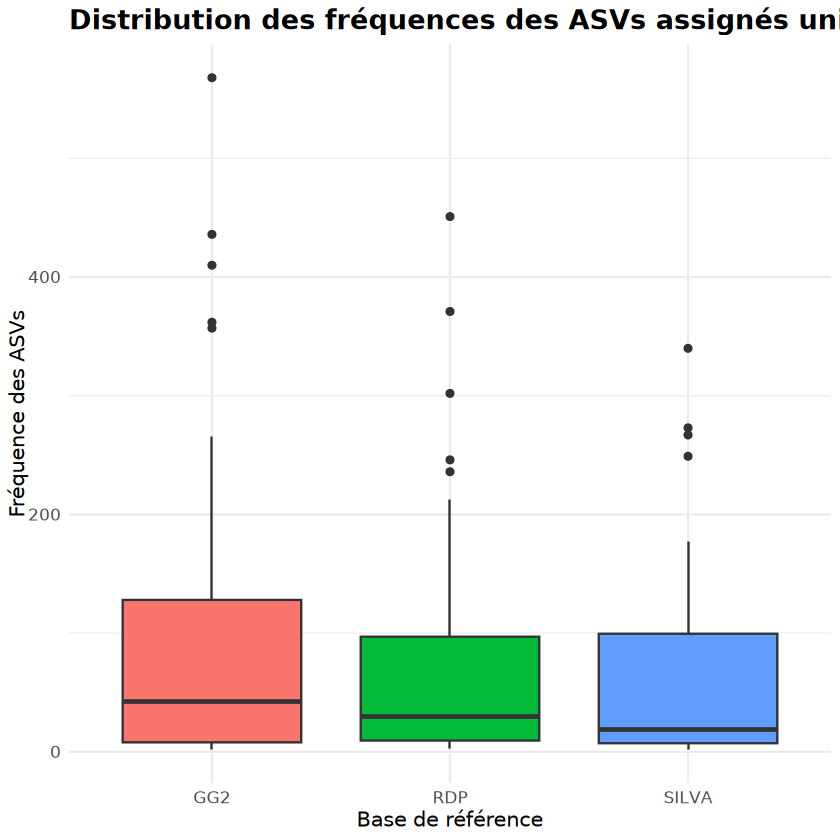

In [75]:
# Représentation graphique de la fréquence relative des ASV assigné par uniquement une des 3 bases.
data_for_plot <- bind_rows(
  tibble(Base = "SILVA", Frequence = result$frequence[result$unique_in_SILVA]),
  tibble(Base = "GG2", Frequence = result$frequence[result$unique_in_GG2]),
  tibble(Base = "RDP", Frequence = result$frequence[result$unique_in_RDP])
)


# Créer le boxplot
ASVunique<-ggplot(data_for_plot, aes(x = Base, y = Frequence, fill = Base)) +
  geom_boxplot() +
  labs(
    title = "Distribution des fréquences des ASVs assignés uniquement par une base de référence",
    x = "Base de référence",
    y = "Fréquence des ASVs"
  ) +
  theme_minimal() +
  theme(legend.position = "none", 
        plot.title = element_text(size = 16, face = "bold"),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10)) 

ASVunique

# Sauvegarde du plot
#ggsave("data/output/figures/ASVunique_15.png", plot = ASVunique, width = 8, height = 6, dpi = 300)


## Diagramme de Venn
### Enumération des chevauchements d'assignations entre les bases

Les 3 assignations d'une meme ASV (une assignation par base) sont ici comparées. Les cas suivant sont quantifié: une base donne une assignation et celle ci est différente des 2 autres, 2 bases donnent la même assignation et celle ci est différent de la troisième base, les 3 bases donnent une assignation.

In [41]:
#identifier les assignations identiques entre SILVA et GG2
SILVA_GG2<-genus_wide %>%
    dplyr::select(ASV, SILVA, GG2)%>% # On ne sélectionne que les 2 bases de données comparées
dplyr::filter (!is.na(SILVA)&!is.na(GG2))%>% # On ne garde que les lignes où les 2 bases de données ont donné une assignation à l'ASV
  mutate(identical_SILVA_GG2 = SILVA == GG2) # On identifie pour chaque ligne la concordance ou non des 2 assignations

# L'opération est répété pour chacune des combinaisons possibles 

#identifier les assignations identiques entre SILVA et RDP
SILVA_RDP<-genus_wide %>%
    dplyr::select(ASV, SILVA, RDP)%>%
dplyr::filter (!is.na(SILVA)&!is.na(RDP))%>% 
  mutate(
    # Comparaison SILVA / GG2
    identical_SILVA_RDP = SILVA == RDP)

#identifier les assignations identiques entre RDP et GG2
RDP_GG2<-genus_wide %>%
    dplyr::select(ASV, RDP, GG2)%>%
dplyr::filter (!is.na(RDP)&!is.na(GG2))%>% 
  mutate(
    # Comparaison SILVA / GG2
    identical_RDP_GG2 = RDP == GG2)

#identifier les assignations identiques pour les 3 bases de données
SILVA_GG2_RDP<-genus_wide %>%
dplyr::filter (!is.na(SILVA)&!is.na(GG2))%>% 
  mutate(
    # Comparaison SILVA / GG2
    all_identical = SILVA == GG2 & RDP == SILVA)

#création d'un tableau énumérant chacune des combnaisons observées en ajoutant les assignations uniques
venn_comparison <- data.frame(
    # pour les comparaisons des bases 2 à 2 on retire le nombre de fois ou les 3 bases donnent la même chose
  SILVA_GG2 = (sum(SILVA_GG2$identical_SILVA_GG2,na.rm=TRUE) - sum(SILVA_GG2_RDP$all_identical,na.rm=TRUE)),
  SILVA_RDP = (sum(SILVA_RDP$identical_SILVA_RDP,na.rm=TRUE) - sum(SILVA_GG2_RDP$all_identical,na.rm=TRUE)),
  RDP_GG2 = (sum(RDP_GG2$identical_RDP_GG2,na.rm=TRUE) - sum(SILVA_GG2_RDP$all_identical,na.rm=TRUE)),
    # pour la combinaison des 3 bases on somme simplement le nombre de fois ou la comparaison des assignations des 3 bases à donné TRUE
  SILVA_GG2_RDP = sum(SILVA_GG2_RDP$all_identical,na.rm=TRUE),
    # le total des assignations par base de donnée est compté comme la somme des cellules ne contenant pas de NA
    total_SILVA = sum(!is.na(genus_wide$SILVA)),
    total_RDP = sum(!is.na(genus_wide$RDP)),
    total_GG2 = sum(!is.na(genus_wide$GG2))
)%>%
mutate(
    # le nombre d'assignation unique pour une base correspond aux nombre total d'assignation moins le nombre d'assignation qui correspond à une des autres bases
    SILVA_only= total_SILVA - (SILVA_GG2+SILVA_RDP+SILVA_GG2_RDP), 
GG2_only=total_GG2 - (SILVA_GG2+RDP_GG2+SILVA_GG2_RDP),
RDP_only=total_RDP - (SILVA_RDP+RDP_GG2+SILVA_GG2_RDP))

View(venn_comparison)


SILVA_GG2,SILVA_RDP,RDP_GG2,SILVA_GG2_RDP,total_SILVA,total_RDP,total_GG2,SILVA_only,GG2_only,RDP_only
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
14,162,61,173,493,483,505,144,257,87


### Représentation graphique

Le diagramme de Venn va nous permette de représenter graphiquement et de facon synthétique les comparaison des assignations réalisées précédemment. 
Le titre et le nom du fichier de la figure sont a adapté selon la température choisi, comme indiqué par les commentaires.

In [31]:
#chargement des packages
library(VennDiagram)
library(grid)

In [42]:
# Créer le diagramme de Venn avec 3 cercles (1 par base)
venn.plot <- venn.diagram(
  x = list(
      #le fonction venn.diagramm attend des données sous la forme de liste, on créé donc 3 listes pour chacune des bases de référence
    SILVA = c(venn_comparison$SILVA_only, venn_comparison$SILVA_RDP, venn_comparison$SILVA_GG2, venn_comparison$SILVA_GG2_RDP),
    RDP = c(venn_comparison$RDP_only, venn_comparison$SILVA_RDP, venn_comparison$RDP_GG2, venn_comparison$SILVA_GG2_RDP),
    GG2 = c(venn_comparison$GG2_only, venn_comparison$SILVA_GG2, venn_comparison$RDP_GG2, venn_comparison$SILVA_GG2_RDP)
  ),
  category.names = c(
    paste0("SILVA (", venn_comparison$total_SILVA, ")"), # Les cercles sont identifiées et le nombre d'assignations par bases et indiqué
    paste0("RDP (", venn_comparison$total_RDP, ")"),
    paste0("GG2 (", venn_comparison$total_GG2, ")")),
    cat.cex = 1.3, # augmentation de la taille des indentifiants des catégories
    filename=NULL,
  col = "black",  # Couleur des bords des cercles
  fill = c("#FDE725FF", "#2D708EFF", "#440154FF"),  # Couleurs des cercles
  alpha = 0.5,  # Transparence des cercles
    label.col=NA, # Enlève les numéro ajoutés pas défaut, les valeurs calculées seront ajoutés manuellement
  main = "Diagramme de Venn des bases de données SILVA,\n RDP et GG2 pour T=15°C", #changer le titre selon la température choisi
    main.cex = 1.4, # augmentation de la taille du titure
    sub = ""
)

# Préparer l'enregistrement du fichier (chemin et titre)
#output_file <- file.path("data/output/figures", "venn_diagram_15.png") #changer le nom du fichier selon la température choisi

# Ouverture de l'enregistrement du graph en png
#png(output_file, width = 800, height = 800)

# Afficher le diagramme
grid.draw(venn.plot)

# Ajouter manuellement les valeurs dans les zones
grid.text(venn_comparison$SILVA_only, x = 0.25, y = 0.65, gp = gpar(fontsize = 16, col = "black", fontface = "bold"))   # SILVA uniquement
grid.text(venn_comparison$RDP_only, x = 0.75, y = 0.65, gp = gpar(fontsize = 16, col = "black", fontface = "bold"))   # RDP uniquement
grid.text(venn_comparison$GG2_only, x = 0.5, y = 0.2, gp = gpar(fontsize = 16, col = "black", fontface = "bold"))   # GG2 uniquement
grid.text(venn_comparison$SILVA_RDP, x = 0.5, y = 0.7, gp = gpar(fontsize = 16, col = "black", fontface = "bold"))   # SILVA & RDP
grid.text(venn_comparison$SILVA_GG2, x = 0.3, y = 0.4, gp = gpar(fontsize = 16, col = "black", fontface = "bold"))   # SILVA & GG2
grid.text(venn_comparison$RDP_GG2, x = 0.7, y = 0.4, gp = gpar(fontsize = 16, col = "black", fontface = "bold"))   # RDP & GG2
grid.text(venn_comparison$SILVA_GG2_RDP, x = 0.5, y = 0.5, gp = gpar(fontsize = 16, col = "black", fontface = "bold"))  # les 3 bases dont d'accords

# Fermer l'enregistrement du graph
#dev.off()

pdf 
  2